In [1]:
import pandas as pd
import numpy as np
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
data = pd.read_csv('payeverywhere.csv', index_col=0)

In [3]:
data['dlk_cob_date'] = pd.to_datetime(data['dlk_cob_date'])

In [4]:
data_copy = data.copy()

In [5]:
data_copy['order_period'] = data_copy['dlk_cob_date'].dt.to_period('M')
data_copy['order_period_day'] = data_copy['dlk_cob_date'].dt.to_period('D')

In [6]:
data_copy['cohort'] = data_copy.groupby('user_id')['dlk_cob_date'].transform('min').dt.to_period('M')
data_copy['cohort_day'] = data_copy.groupby('user_id')['dlk_cob_date'].transform('min').dt.to_period('D')

In [7]:
data_copy['period_number_month'] = np.floor((data_copy.order_period_day - data_copy.cohort_day).apply(attrgetter('n'))/30)

In [8]:
data_copy

,dlk_cob_date,user_id,order_period,order_period_day,cohort,cohort_day,period_number_month
0,2023-08-22,a95b0e7e-deda-4cb8-81d2-cff4a01e9077,2023-08,2023-08-22,2023-03,2023-03-31,4.0
1,2023-06-12,4f53a875-847f-47cb-ab16-3517ca9cf92c,2023-06,2023-06-12,2023-04,2023-04-04,2.0
2,2024-08-15,f04fb972-ff9c-41ce-8dbc-a0984e6017ae,2024-08,2024-08-15,2023-12,2023-12-04,8.0
3,2023-12-08,1d9bcb51-351d-4679-8aba-95f38b9c56e9,2023-12,2023-12-08,2023-07,2023-07-28,4.0
4,2024-10-15,21d807eb-1ae4-4061-a403-96b5eefdd312,2024-10,2024-10-15,2023-04,2023-04-10,18.0
...,...,...,...,...,...,...,...
171191,2024-08-21,2e1b98cd-efad-428c-b590-5a25bc40642c,2024-08,2024-08-21,2024-01,2024-01-24,7.0
171192,2024-09-19,3e798ca0-d77d-430a-950b-c6086c03ab7e,2024-09,2024-09-19,2024-05,2024-05-21,4.0
171193,2024-02-01,b5f92dcc-5203-453d-a00c-7b3c6fd3a774,2024-02,2024-02-01,2023-09,2023-09-29,4.0
171194,2024-04-25,a070d584-da4d-4587-a62e-76701337cf21,2024-04,2024-04-25,2023-04,2023-04-08,12.0


In [9]:
df_cohort = data_copy.groupby(['cohort', 'period_number_month']).agg(n_customers = ('user_id', 'nunique')).reset_index()

In [10]:
df_cohort

,cohort,period_number_month,n_customers
0,2023-01,0.0,162
1,2023-01,1.0,81
2,2023-01,2.0,90
3,2023-01,3.0,77
4,2023-01,4.0,69
...,...,...,...
248,2024-08,1.0,117
249,2024-08,2.0,41
250,2024-09,0.0,258
251,2024-09,1.0,56


In [11]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [12]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2023-01,162.0,81.0,90.0,77.0,69.0,70.0,67.0,71.0,68.0,64.0,...,53.0,46.0,51.0,50.0,47.0,51.0,44.0,39.0,39.0,25.0
2023-02,138.0,49.0,48.0,45.0,44.0,41.0,38.0,33.0,43.0,41.0,...,42.0,35.0,39.0,37.0,30.0,33.0,35.0,27.0,17.0,NaN
2023-03,301.0,114.0,104.0,97.0,86.0,83.0,74.0,78.0,81.0,79.0,...,73.0,80.0,78.0,73.0,79.0,75.0,71.0,24.0,NaN,NaN
2023-04,591.0,213.0,178.0,179.0,172.0,169.0,178.0,146.0,137.0,135.0,...,138.0,135.0,132.0,128.0,119.0,116.0,94.0,NaN,NaN,NaN
2023-05,480.0,178.0,162.0,143.0,123.0,130.0,111.0,104.0,89.0,96.0,...,91.0,92.0,94.0,91.0,72.0,53.0,NaN,NaN,NaN,NaN
2023-06,589.0,199.0,173.0,168.0,167.0,159.0,138.0,119.0,103.0,119.0,...,106.0,107.0,89.0,88.0,56.0,NaN,NaN,NaN,NaN,NaN
2023-07,543.0,184.0,162.0,161.0,157.0,137.0,108.0,112.0,106.0,111.0,...,100.0,97.0,93.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,743.0,264.0,235.0,210.0,181.0,172.0,174.0,143.0,146.0,147.0,...,129.0,114.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,752.0,259.0,218.0,180.0,168.0,142.0,122.0,129.0,125.0,133.0,...,102.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
cohort_size = cohort_pivot.iloc[:, 0]

In [18]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [21]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,0.500000,0.555556,0.475309,0.425926,0.432099,0.413580,0.438272,0.419753,0.395062,...,0.327160,0.283951,0.314815,0.308642,0.290123,0.314815,0.271605,0.240741,0.240741,0.154321
2023-02,1.0,0.355072,0.347826,0.326087,0.318841,0.297101,0.275362,0.239130,0.311594,0.297101,...,0.304348,0.253623,0.282609,0.268116,0.217391,0.239130,0.253623,0.195652,0.123188,NaN
2023-03,1.0,0.378738,0.345515,0.322259,0.285714,0.275748,0.245847,0.259136,0.269103,0.262458,...,0.242525,0.265781,0.259136,0.242525,0.262458,0.249169,0.235880,0.079734,NaN,NaN
2023-04,1.0,0.360406,0.301184,0.302876,0.291032,0.285956,0.301184,0.247039,0.231810,0.228426,...,0.233503,0.228426,0.223350,0.216582,0.201354,0.196277,0.159052,NaN,NaN,NaN
2023-05,1.0,0.370833,0.337500,0.297917,0.256250,0.270833,0.231250,0.216667,0.185417,0.200000,...,0.189583,0.191667,0.195833,0.189583,0.150000,0.110417,NaN,NaN,NaN,NaN
2023-06,1.0,0.337861,0.293718,0.285229,0.283531,0.269949,0.234295,0.202037,0.174873,0.202037,...,0.179966,0.181664,0.151104,0.149406,0.095076,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.338858,0.298343,0.296501,0.289134,0.252302,0.198895,0.206262,0.195212,0.204420,...,0.184162,0.178637,0.171271,0.082873,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.355316,0.316285,0.282638,0.243607,0.231494,0.234186,0.192463,0.196501,0.197847,...,0.173620,0.153432,0.079408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.344415,0.289894,0.239362,0.223404,0.188830,0.162234,0.171543,0.166223,0.176862,...,0.135638,0.067819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


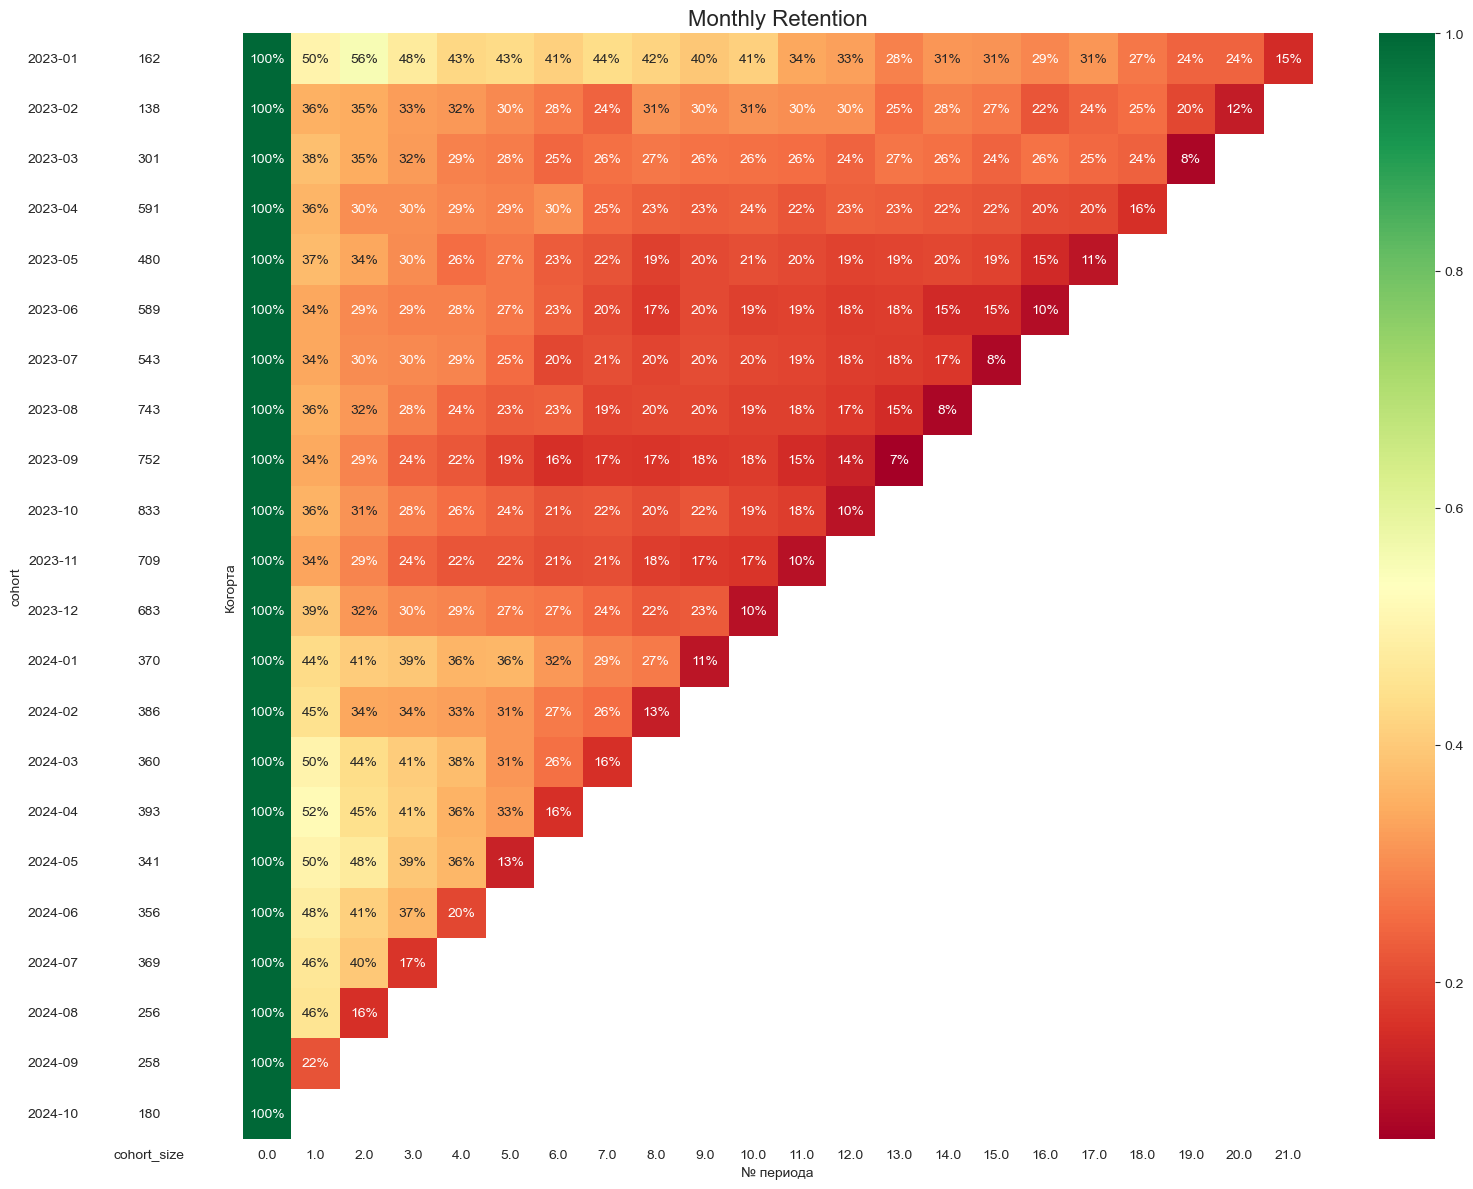

In [22]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1,2,figsize=(16,12), sharey=True, gridspec_kw={'width_ratios': [1,11]})
    
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True,fmt='.0%',cmap='RdYlGn',ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')
    
    cohort_size_df=pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, cbar=False, annot=True,fmt='g',cmap=white_cmap,ax=ax[0])
    
    fig.tight_layout()
    plt.show()

In [23]:
retention_matrix_long = retention_matrix.reset_index() \
                                        .melt(id_vars='cohort', var_name='period_number_month', value_name='n_customers')
retention_matrix_long

,cohort,period_number_month,n_customers
0,2023-01,0.0,1.0
1,2023-02,0.0,1.0
2,2023-03,0.0,1.0
3,2023-04,0.0,1.0
4,2023-05,0.0,1.0
...,...,...,...
479,2024-06,21.0,NaN
480,2024-07,21.0,NaN
481,2024-08,21.0,NaN
482,2024-09,21.0,NaN


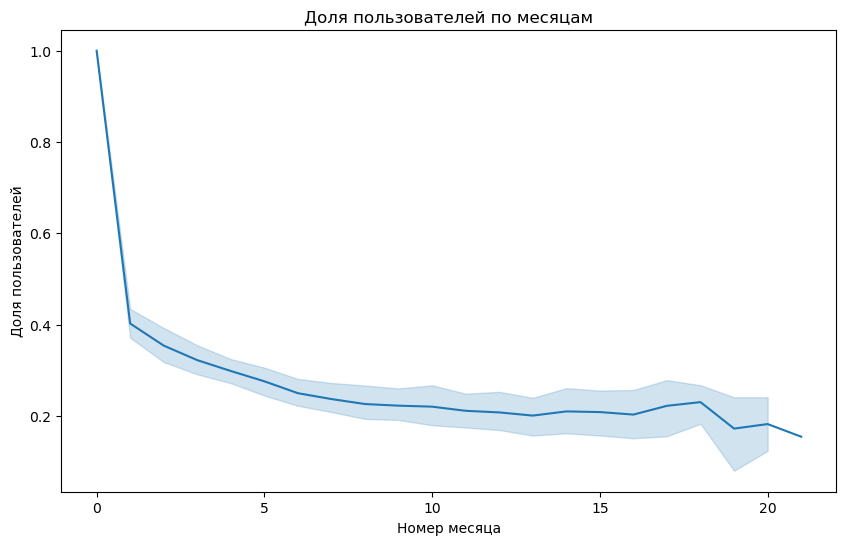

In [38]:
# создаем график
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_matrix_long, x='period_number_month', y='n_customers')

# подписи для графика
plt.title('Доля пользователей по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Доля пользователей')

# выводим график
plt.show()